# Rendering Techniques
---

Since Unstructured Grids require significantly more overhead to represent compared to Structured (a.k.a. Regular) grids, the choice of rendering technique plays an important in obtaining high-resolution, accurate, and scalable visualuations. 


This notebook introduces relevant concepts and techniques that will be mentioned and used throughout this Cookbook.

## Vector (Shape) Geometries

The nodes, edges, and faces that make up an Unstructured Grid can each be converted into a geometric shape for visualization. These geometric shapes can often be referred to as vector graphics, since each geometry is mathematically represented when rendering.

For example, in the UXarray Visualization section, we will showcase how we can convert the faces in our Unstructured Grid into Polygons.

When constructing our visualization, we can render each face using directly onto the screen. 

Rendering each face as a polygon will lead to visuals that look like this, which are extremely high-quality and represent the exact geometry of each face.

&nbsp;

<img src="../images/rendering/polygons.png" alt="Continents" width="400"/>

Another example of Vector Geometries is encountered when adding features to a visualization, such as Contents or Borders. The geometries of these features are drawn onto our screen.

&nbsp;

<img src="../images/rendering/contients.jpg" alt="Continents" width="600"/>

### Shapely Example

One Python package which is used for representing and manipulating geometries is [Shapely](https://shapely.readthedocs.io/en/stable/manual.html).

UXarray uses Shapely paired with SpatialPandas and other packages to represent unstructured grid elements (nodes, edges, faces) as geometries for visualization.

The following code snippets are basic examples of how these elements can be represented as geometries.


In [1]:
import shapely as sp

A node is represented as a pair of longitude and latitude coordinates

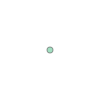

In [2]:
sp.Point([0.0, 0.0])

An edge is represented as a pair of nodes.

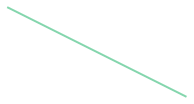

In [3]:
sp.LineString([[0.0, 0.0], [180, -90]])

A face is represented as a counter-clockwise set of nodes, with the first and final nodes in the set being equivalent (form a closed face)

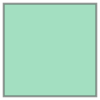

In [4]:
sp.Polygon([[100, 40], [100, 50], [90, 50], [90, 40], [100, 40]])

## Rasterization

While there is definitely merit in rendering each geometric shape directly, this operation is extremely computationally expensive for large datasets.

Rasterization is a technique in computer graphics that converts vector (a.k.a geometric shapes) graphics into a raster image, which can be thought of as a regularly-sampled array of pixel values used for rendering.

The figure below shows a simplified example of how rasterization "approximates" the geometry of different elements.

&nbsp;

<img src="../images/rendering/raster_example.png" alt="Rasterization Example" width="1000"/>

For unstructured grids, rasterization looks something like the following.

&nbsp;

<img src="../images/rendering/raster-vs-vector.png" alt="raster and vector" width="400"/>

&nbsp;

The black edges outline the expected geometry of each face (a.k.a polygon).

We can observe the jaggedness in the shading, which is the product of rasterization approximating each face.